In [1]:
# importing necessary libraries

import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding

In [2]:
# reading train and test dataset

train_df = pd.read_csv("./fraudTrain.csv", index_col=0)
test_df = pd.read_csv("./fraudTest.csv", index_col=0)

In [3]:
# printing shapes of the data

print(train_df.shape)
print(test_df.shape)

(1296675, 22)
(555719, 22)


In [4]:
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# data types of the dataset

train_df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
# describing the dataset using transpose

train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
trans_date_trans_time,1296675,1274791,2019-04-22 16:02:01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,1296675.0,NaN,NaN,NaN,417192042079726656.0,1308806447000240384.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0
merchant,1296675,693,fraud_Kilback LLC,4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1296675,14,gas_transport,131659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,1296675.0,NaN,NaN,NaN,70.351035,160.316039,1.0,9.65,47.52,83.14,28948.9
first,1296675,352,Christopher,26669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,1296675,481,Smith,28794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1296675,2,F,709863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,1296675,983,0069 Robin Brooks Apt. 695,3123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1296675,894,Birmingham,5617,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# checking for null values

train_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
# checking duplicate values

train_df.duplicated().sum()

0

In [9]:
# converting feature to datetime datatype

train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

In [10]:
# Checking start date and end date in train data

print("Start Date: ", min(train_df['trans_date_trans_time']))
print("End Date: ", max(train_df['trans_date_trans_time']))

Start Date:  2019-01-01 00:00:18
End Date:  2020-06-21 12:13:37


In [11]:
# Checking target variable 'is_fraud' in train data and test data

print("Train Test: ", train_df['is_fraud'].value_counts())
print("Test Test:", test_df['is_fraud'].value_counts())

Train Test:  is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Test Test: is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [12]:
# Creating year, date, month features from 'trans_date_trans_time'

train_df['year'] = train_df['trans_date_trans_time'].dt.year
train_df['date'] = train_df['trans_date_trans_time'].dt.date
train_df['month'] = train_df['trans_date_trans_time'].dt.month

In [13]:
# Total Transaction Amount in 2019 and 2020

monthly = train_df.loc[train_df['year'] == 2019]
monthly_amt = monthly.groupby('month')['amt'].sum().reset_index()

monthly = train_df.loc[train_df['year'] == 2020]
monthly_amt = monthly.groupby('month')['amt'].sum().reset_index()

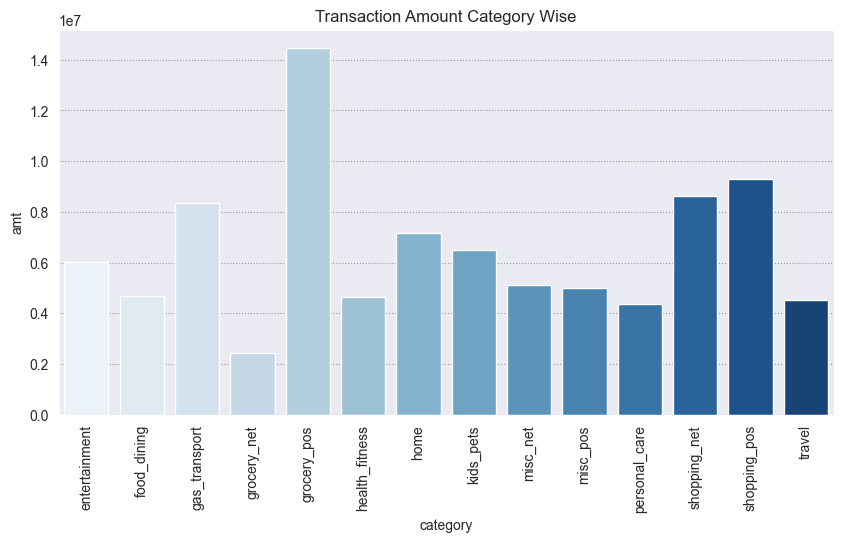

 'grocery_pos' has the highest transaction amount, followed by 'shopping_pos' and 'shopping_net' 
 'grocery_net' has the lowest transaction amount, followed by 'personal_care' and 'health_fitness' 


In [14]:
# Transaction Amount Category wise

plt.figure(figsize=(10,5))
cat_amt = train_df.groupby('category')['amt'].sum().reset_index()

sns.barplot(cat_amt, x = 'category', y = 'amt', palette='Blues')

plt.xticks(rotation = 90)
plt.title("Transaction Amount Category Wise")
plt.show()

print(" 'grocery_pos' has the highest transaction amount, followed by 'shopping_pos' and 'shopping_net' ")
print(" 'grocery_net' has the lowest transaction amount, followed by 'personal_care' and 'health_fitness' ")

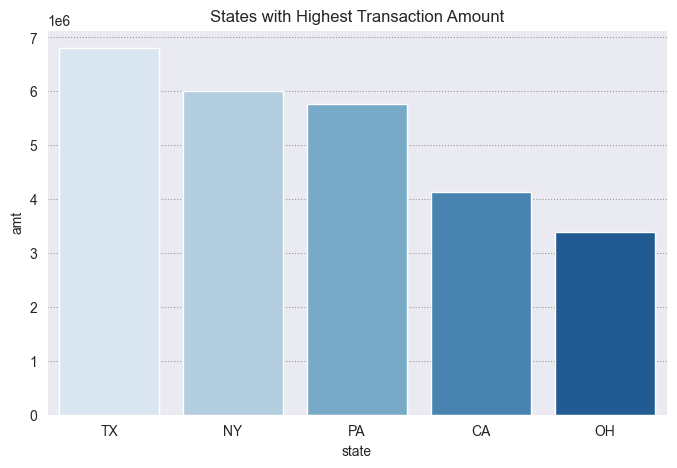

State 'TX' has the highest transaction amount 


In [16]:
# States with Highest Transaction Amount

plt.figure(figsize=(8,5))

top5_state_trans = train_df.groupby('state')['amt'].sum().sort_values(ascending=False).reset_index().head(5)
sns_1a = sns.barplot(x=top5_state_trans['state'], y = top5_state_trans['amt'], palette = 'Blues')
plt.title("States with Highest Transaction Amount")

plt.show()

print("State 'TX' has the highest transaction amount ")

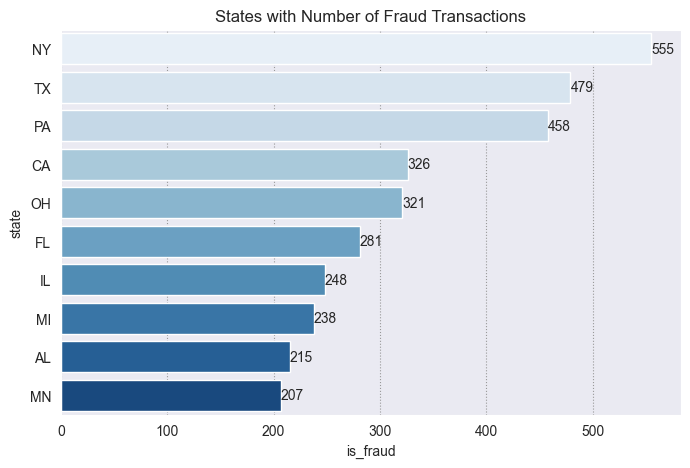

 'NY' is the state with highest number of fraud transactions, while  'MN' has least fraud transactions 


In [17]:
# Grouping the data by 'is_fraud' and plotting to know the number of fraud transactions

plt.figure(figsize=(8,5))

fraudstate_trans = train_df.groupby('state')['is_fraud'].sum().sort_values(ascending=False).reset_index().head(10)
sns_1a = sns.barplot(x=fraudstate_trans['is_fraud'], y = fraudstate_trans['state'], palette = 'Blues')
plt.title("States with Number of Fraud Transactions")

for i in sns_1a.containers:
    sns_1a.bar_label(i)

plt.show()

print(" 'NY' is the state with highest number of fraud transactions, while  'MN' has least fraud transactions ")

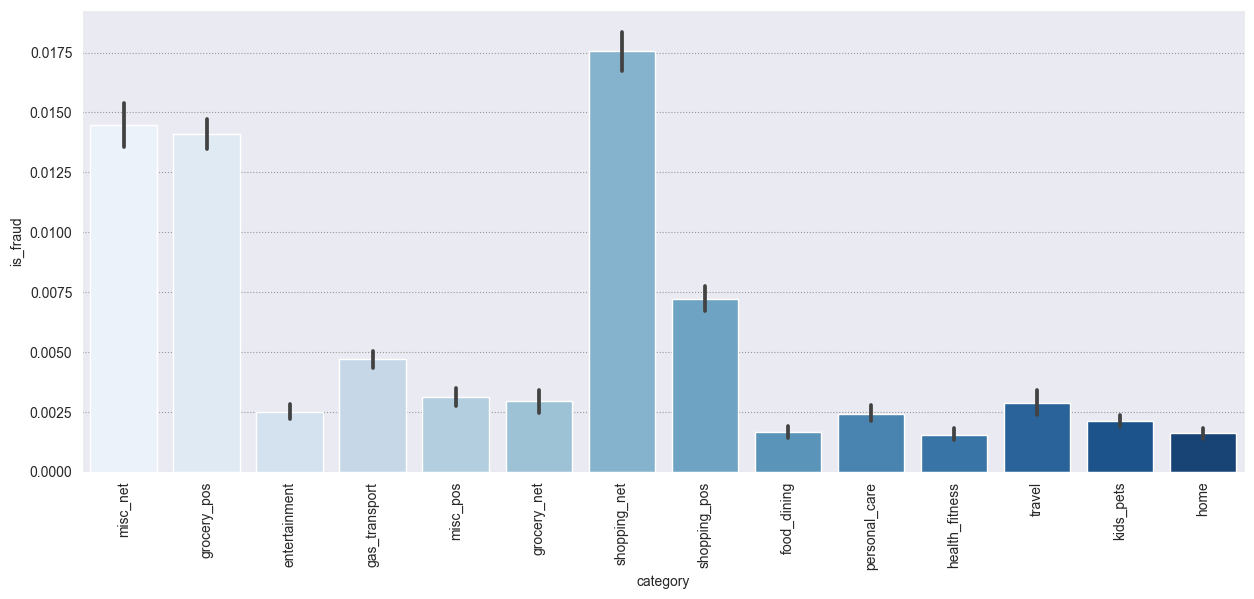

'shopping_net' has highest fraud transactions, while 'home' and 'food_dining' has least fraud transactions


In [18]:
# Barplot of 'category' Vs 'is_fraud'

plt.figure(figsize=(15,6))
sns.barplot(x = train_df['category'], y = train_df['is_fraud'], palette = 'Blues')
plt.xticks(rotation=90)
plt.show()

print("'shopping_net' has highest fraud transactions, while 'home' and 'food_dining' has least fraud transactions")

C:\Users\KaMaL RaJiT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


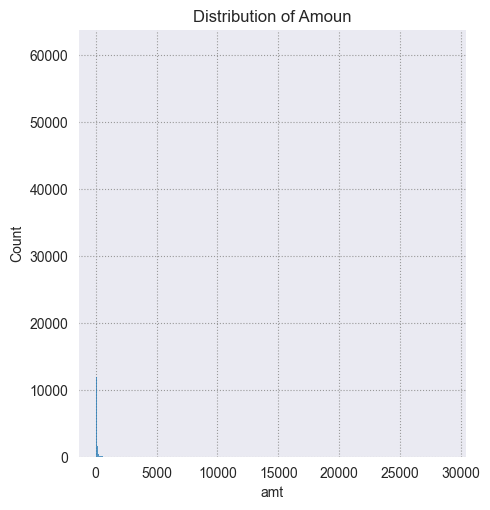

In [19]:
# Distribution Plot of 'amount'

sns.displot(train_df['amt'])
plt.title("Distribution of Amoun")
plt.show()

In [20]:
# using log transformation, to remove the skewness in the 'amount' feature using np.log()

train_df['amt'] = np.log(train_df['amt'])
test_df['amt'] = np.log(test_df['amt'])

C:\Users\KaMaL RaJiT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


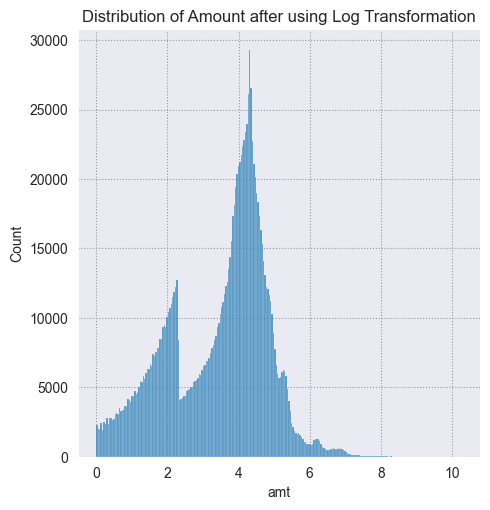

In [21]:
# Distribution plot after using log transformation

sns.displot(train_df['amt'])
plt.title("Distribution of Amount after using Log Transformation")
plt.show()

In [22]:
# selecting the features for train_df and test_df

train_df = train_df[['amt', 'zip', 'lat', 'long', 'city_pop', 'category', 'gender', 'is_fraud']]
test_df = test_df[['amt', 'zip', 'lat', 'long', 'city_pop', 'category', 'gender', 'is_fraud']]

In [23]:
# mapping 'gender' from categorical values to numeric values

train_df['gender'] = train_df['gender'].map({'F':0, 'M':1})
test_df['gender'] = test_df['gender'].map({'F':0, 'M':1})

In [24]:
# creating dummies for 'category' using pd.get_dummies

train_df = pd.get_dummies(train_df, columns=['category'], prefix=['category'], dtype='int')
test_df = pd.get_dummies(test_df, columns=['category'], prefix=['category'], dtype='int')

In [25]:
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [26]:
train_df.head()

,amt,zip,lat,long,city_pop,gender,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,1.603420,28654,36.0788,-81.1781,3495,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,4.674976,99160,48.8878,-118.2105,149,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,5.394127,83252,42.1808,-112.2620,4154,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.806662,59632,46.2306,-112.1138,1939,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3.736717,24433,38.4207,-79.4629,99,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
test_df.head()

,amt,zip,lat,long,city_pop,gender,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,1.050822,29209,33.9659,-80.9355,333497,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3.395850,84002,40.3207,-110.4360,302,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3.720378,11710,40.6729,-73.5365,34496,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4.095178,32780,28.5697,-80.8191,54767,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1.160021,49632,44.2529,-85.0170,1126,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# splitting the data into train data and test data

x_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
x_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

In [29]:
smt = SMOTE()
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [30]:
# Standardizing the data using StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [31]:
# Create an instance of RandomForestClassifier
# using 'class_weights' to balance the target feature, which is imbalanced
# fitting the model on train data
# predicting the model of test data
# evaluation metrics

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
ypred_rf = rf.predict(x_test)

print("Confusion Matrix: ", '\n', confusion_matrix(y_test, ypred_rf))
print("Classification Report: ", '\n', classification_report(y_test, ypred_rf))
print("ROC AUC Score: ", '\n', roc_auc_score(y_test, ypred_rf))
print("F1 Score: ", metrics.f1_score(y_test, ypred_rf))

Confusion Matrix:  
 [[553097    477]
 [   945   1200]]
Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.56      0.63      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.78      0.81    555719
weighted avg       1.00      1.00      1.00    555719

ROC AUC Score:  
 0.7792894430119085
F1 Score:  0.6279434850863423


In [32]:
# Create an instance of XGBClassifier
# fitting the model on train data
# predicting the model of test data
# evaluation metrics

xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)
ypred_xgbc = xgbc.predict(x_test)

print("Confusion Matrix: ", '\n', confusion_matrix(y_test, ypred_xgbc))
print("Classification Report: ", '\n', classification_report(y_test, ypred_xgbc))
print("ROC AUC Score: ", '\n', roc_auc_score(y_test, ypred_xgbc))
print("F1 Score: ", metrics.f1_score(y_test, ypred_xgbc))

Confusion Matrix:  
 [[553141    433]
 [   949   1196]]
Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.73      0.56      0.63      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.78      0.82    555719
weighted avg       1.00      1.00      1.00    555719

ROC AUC Score:  
 0.7783967838303845
F1 Score:  0.6338102808691045


##### Sequential

In [33]:
# Create an instance of Sequential()
# adding 'Dense' layers along with activation function
# 'compile' is used to specify loss, optimizer and metrics that is used to train and evaluate the model
# 'optimizer' updates the model weights to minimize the loss function
# 'loss' measures how well the model's predictions match the actual targets
# 'metrics' are used to evaluate the performance on train and test data
# fitting the model on train data
# number of epochs depends on the complexity and size of the training data.
# evaluation metrics

model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
ypred_seq = model.predict(x_test)

print("ROC AUC Score: ", '\n', roc_auc_score(y_test, ypred_seq))

Epoch 1/10
40522/40522 [==============================] - 79s 2ms/step - loss: 0.0136 - accuracy: 0.9959
Epoch 2/10
40522/40522 [==============================] - 79s 2ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 3/10
40522/40522 [==============================] - 79s 2ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 4/10
40522/40522 [==============================] - 78s 2ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 5/10
40522/40522 [==============================] - 78s 2ms/step - loss: 0.0100 - accuracy: 0.9969
Epoch 6/10
40522/40522 [==============================] - 79s 2ms/step - loss: 0.0100 - accuracy: 0.9969
Epoch 7/10
40522/40522 [==============================] - 79s 2ms/step - loss: 0.0101 - accuracy: 0.9969
Epoch 8/10
40522/40522 [==============================] - 79s 2ms/step - loss: 0.0099 - accuracy: 0.9969
Epoch 9/10
40522/40522 [==============================] - 79s 2ms/step - loss: 0.0100 - accuracy: 0.9969
Epoch 10/10
17367/17367 [==============================

In [34]:
# confusion matrix

confusion_matrix = np.zeros((2, 2))
for i in range(len(y_test)):
    confusion_matrix[y_test[i], np.argmax(ypred_seq[i])] += 1
    
print("Confusion Matrix:", '\n', confusion_matrix)
print("Recall Score: ", metrics.recall_score(y_test, ypred_rf))

Confusion Matrix: 
 [[553574.      0.]
 [  2145.      0.]]
Recall Score:  0.5594405594405595


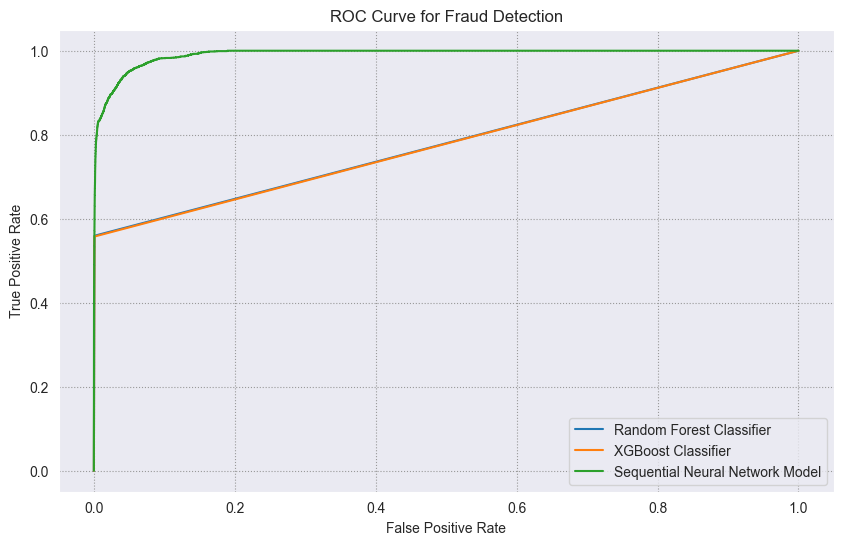

In [35]:
# Calculate the ROC curve for the random forest classifier
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, ypred_rf)

# Calculate the ROC curve for the XGBoost classifier
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, ypred_xgbc)

# Calculate the ROC curve for the sequential neural network model
fpr_seq, tpr_seq, thresholds_seq = roc_curve(y_test, ypred_seq)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost Classifier')
plt.plot(fpr_seq, tpr_seq, label='Sequential Neural Network Model')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection')
plt.legend()
plt.show()